<a href="https://colab.research.google.com/github/shadmanshakib09/Statistics/blob/main/Feature_Selection_using_Chi_Square_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
##['sex','embarked','alone','pclass','survived']
df = df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [6]:
df.isnull().sum()

,0
sex,0
embarked,2
alone,0
pclass,0
survived,0


In [7]:
df.dropna(inplace=True)
df.isnull().sum()

,0
sex,0
embarked,0
alone,0
pclass,0
survived,0


In [8]:
#label encoding
df['sex'] = df['sex'].map({'male':1,'female':0})
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [9]:
df['alone'] = df['alone'].map({True:1,False:0})
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,0,3,0
1,0,C,0,1,1
2,0,S,1,3,1
3,0,S,0,1,1
4,1,S,1,3,0


In [10]:
df['embarked'] = df['embarked'].map({'C':1,'Q':2,'S':3})
df.head()

,sex,embarked,alone,pclass,survived
0,1,3,0,3,0
1,0,1,0,1,1
2,0,3,1,3,1
3,0,3,0,1,1
4,1,3,1,3,0


In [11]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('survived',axis=1),df['survived'],test_size=0.2,random_state=0)
X_train.head()

,sex,embarked,alone,pclass
364,1,2,0,3
256,0,1,1,1
477,1,3,0,3
272,0,3,0,2
554,0,3,1,3


In [12]:
X_train.shape,X_test.shape

((711, 4), (178, 4))

In [13]:
y_train.shape,y_test.shape

((711,), (178,))

In [14]:
X_train.isnull().sum()

,0
sex,0
embarked,0
alone,0
pclass,0


In [15]:
X_test.isnull().sum()

,0
sex,0
embarked,0
alone,0
pclass,0


In [16]:
X_train.shape,y_train.shape

((711, 4), (711,))

In [17]:
#chi-square test

from sklearn.feature_selection import chi2
f_scores, p_values = chi2(X_train,y_train)
print(f_scores)
print(p_values)

[82.41541237  6.04245964 13.4382363  22.65169202]
[1.10290444e-19 1.39658135e-02 2.46547298e-04 1.94189138e-06]


In [19]:
f_scores = pd.Series(f_scores,index=X_train.columns).sort_values(ascending=False)
f_scores

,0
sex,82.415412
pclass,22.651692
alone,13.438236
embarked,6.042460


In [20]:
p_values = pd.Series(p_values,index=X_train.columns).sort_values(ascending=False)
p_values

,0
embarked,1.396581e-02
alone,2.465473e-04
pclass,1.941891e-06
sex,1.102904e-19


The higher the F-SCORE,the higehr it is useful.
The lesser the p-value, the higher it is useful

<Axes: xlabel='None', ylabel='None'>

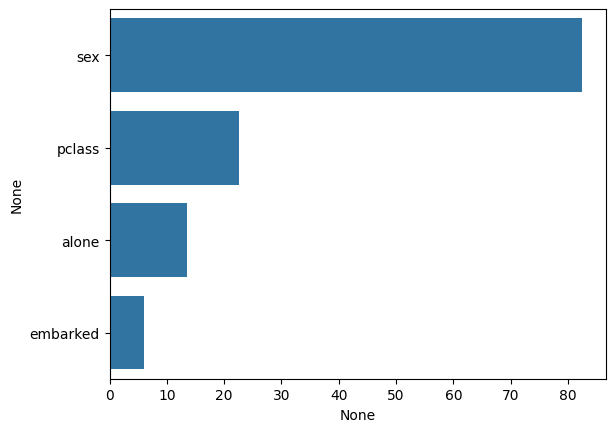

In [29]:
sns.barplot(y=f_scores.index,x=f_scores)


<ipython-input-36-8f4a30806f22>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=f_scores.index, x=f_scores, palette=palette)


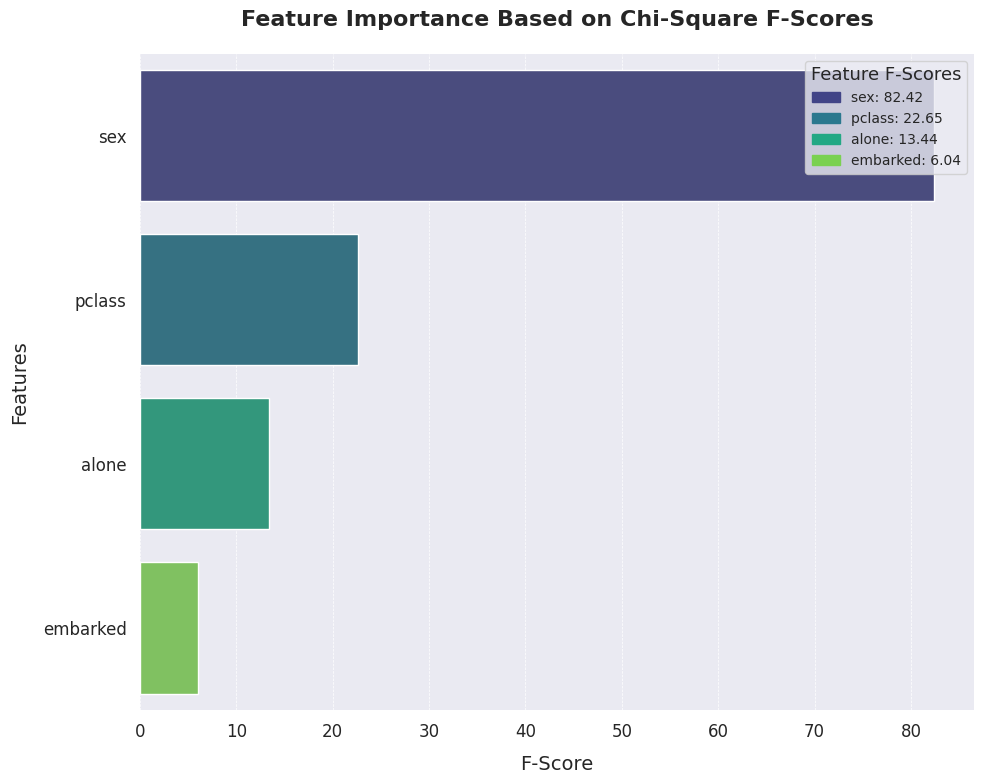

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Given F-scores
f_scores = {
    "sex": 82.415412,
    "pclass": 22.651692,
    "alone": 13.438236,
    "embarked": 6.042460
}

# Convert the dictionary to a pandas Series
f_scores = pd.Series(f_scores)

# Set a professional style
sns.set(style="darkgrid")

# Create a color palette
palette = sns.color_palette("viridis", len(f_scores))

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=f_scores.index, x=f_scores, palette=palette)

# Add titles and labels
ax.set_title("Feature Importance Based on Chi-Square F-Scores", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("F-Score", fontsize=14, labelpad=10)
ax.set_ylabel("Features", fontsize=14, labelpad=10)

# Adjust ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create custom legend handles to match bar colors
handles = [Patch(color=palette[i], label=f"{feature}: {f_score:.2f}")
           for i, (feature, f_score) in enumerate(f_scores.items())]

# Add the legend with custom handles
plt.legend(handles=handles, loc='upper right', fontsize=10, title="Feature F-Scores", title_fontsize='13')

# Add grid lines for easier interpretation
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
ax.yaxis.grid(False)

# Remove the top and right spines
sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='None', ylabel='None'>

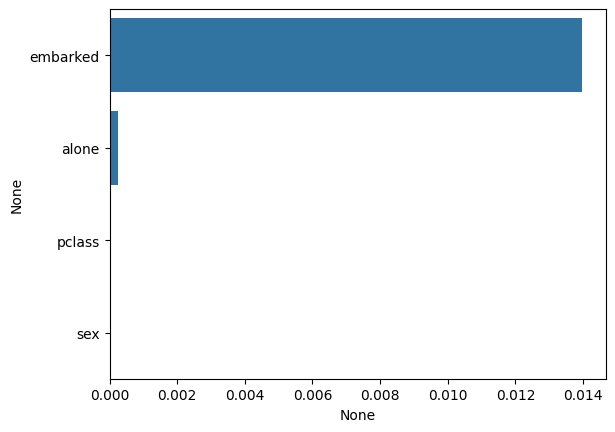

In [28]:
sns.barplot(y=p_values.index,x=p_values)

<ipython-input-37-6af36c6ff6fa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=p_values.index, x=p_values, palette=palette)


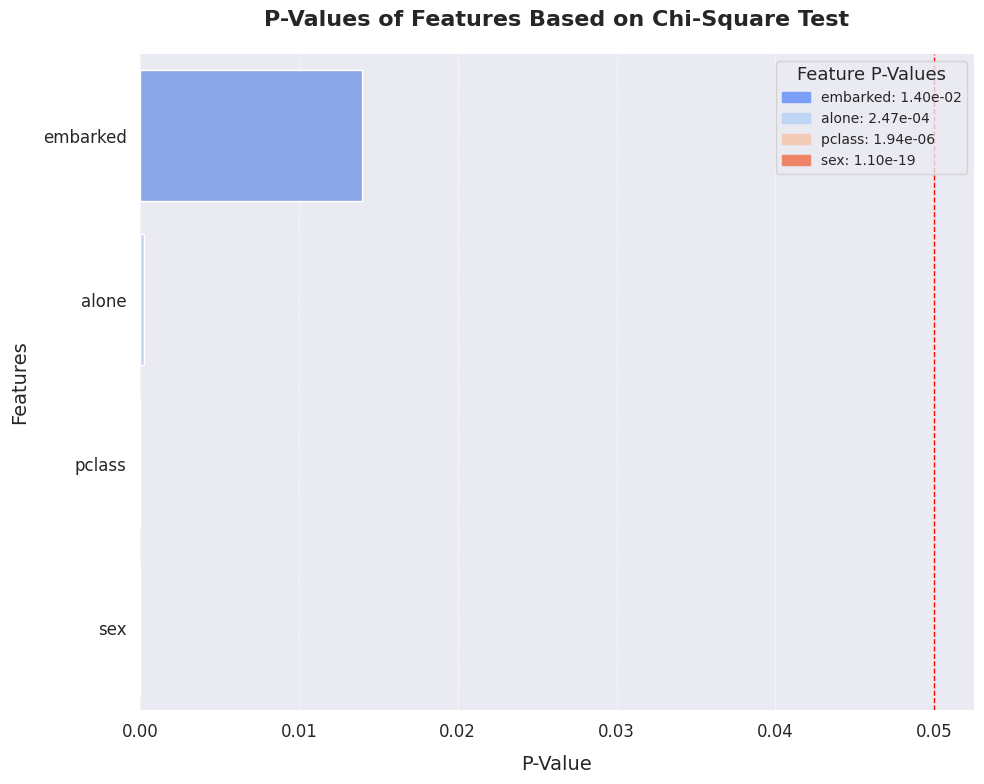

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Given p-values
p_values = {
    "embarked": 1.396581e-02,
    "alone": 2.465473e-04,
    "pclass": 1.941891e-06,
    "sex": 1.102904e-19
}

# Convert the dictionary to a pandas Series
p_values = pd.Series(p_values)

# Set a professional style
sns.set(style="darkgrid")

# Create a color palette
palette = sns.color_palette("coolwarm", len(p_values))

# Plot the bar plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=p_values.index, x=p_values, palette=palette)

# Add titles and labels
ax.set_title("P-Values of Features Based on Chi-Square Test", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("P-Value", fontsize=14, labelpad=10)
ax.set_ylabel("Features", fontsize=14, labelpad=10)

# Adjust ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a vertical line to indicate significance level (e.g., 0.05)
plt.axvline(x=0.05, color='red', linestyle='--', linewidth=1, label='Significance Level (0.05)')

# Create custom legend handles to match bar colors
handles = [Patch(color=palette[i], label=f"{feature}: {p_value:.2e}")
           for i, (feature, p_value) in enumerate(p_values.items())]

# Add the legend with custom handles
plt.legend(handles=handles, loc='upper right', fontsize=10, title="Feature P-Values", title_fontsize='13')

# Add grid lines for easier interpretation
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
ax.yaxis.grid(False)

# Remove the top and right spines
sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()
plt.show()
